<table >
    <colgroup>
       <col span="1" style="width: 10%;text-align: left">
       <col span="1" style="width: 20%;text-align: left">
    </colgroup>
  <td style="background-color: white; vertical-align: top">
   <img src="../FH_Koblenz.svg" width="80%" float="left"/>
  </td>
  <td style="text-align:left; background-color: white; vertical-align: top">
    <span style="color:#6e6f72ff;font-size:10px"> Prof. Dr.-Ing. Fábio Bisogno<br>Hochschule Koblenz<br>Fachbereich Ingenieurwesen<br>Elektrotechnik und Informationstechnik<br>E-mail: bisogno@hs-koblenz.de<br>Raum: G078 </span>
  </td>
</table>


# Elektronik I

## Grundlagenwiederholung 

### transiente und stationäre Zeitverläufe

#### transiente Zeitverläufe



In [4]:
# Importieren der benötigten Bibliotheken
import numpy as np  # Für numerische Berechnungen
from math import pi  # Für die Konstante π
import matplotlib.pyplot as plt  # Für das Erstellen von Diagrammen
import ipywidgets as widgets  # Für interaktive Widgets

# Aktiviert interaktive Diagramme in Jupyter-Notebooks
%matplotlib widget

# Erstellung einer Figur mit 3 Diagrammbereichen (Subplots)
fig = plt.figure(figsize=(10, 3))
ax0 = fig.add_subplot(1, 3, 1)  # Erstes Diagramm
ax1 = fig.add_subplot(1, 3, 2)  # Zweites Diagramm
ax2 = fig.add_subplot(1, 3, 3)  # Drittes Diagramm

# Definition der Funktion, die die Differentialgleichung löst und die Diagramme aktualisiert
def eq_dif(xi, T_n, iLo, vCo):
    # Löschen der vorherigen Inhalte der Diagramme
    ax0.clear()
    ax1.clear()
    ax2.clear()
    
    # Berechnung der Frequenz und der Kreisfrequenz
    f_n = 1 / T_n  # Frequenz
    omega_n = 2 * pi * f_n  # Kreisfrequenz
    
    # Anpassen des Anfangswerts von iLo (i_L(0)) basierend auf omega_n
    iLo = iLo / omega_n
    
    # Berechnung der charakteristischen Wurzeln des Systems
    r1 = omega_n * (-xi + np.sqrt(xi**2 - 1 + 1j * 0))  # Erste Wurzel
    r2 = omega_n * (-xi - np.sqrt(xi**2 - 1 + 1j * 0))  # Zweite Wurzel
    
    # Sicherstellen, dass r1 und r2 nicht identisch sind
    if r1 == r2:
        r2 = r2 + 1e-3
    
    # Berechnung der Konstanten K1 und K2
    K1 = (-2 * iLo * omega_n * xi - iLo * r2 - vCo + 1) / (r1 - r2)
    K2 = (2 * iLo * omega_n * xi + iLo * r1 + vCo - 1) / (r1 - r2)
    
    # Zeitkonstante des Systems
    T_const = 1 / (omega_n * 0.1)
    
    # Erstellen der Zeitachsen für das Diagramm
    Ticks_n = np.arange(0, 5 * T_const, 1 / f_n)  # Markierungen
    t = np.linspace(0, 5 * T_const, 1000)  # Kontinuierliche Zeitachse
    
    # Berechnung von i_L(t) (Strom) und den Hüllkurven
    iL = K1 * np.exp(r1 * t) + K2 * np.exp(r2 * t)
    iL1 = abs(K1) * np.exp(r1.real * t) + abs(K2) * np.exp(r2.real * t)
    iL2 = -iL1
    
    # Berechnung von v_C(t) (Spannung) und den Hüllkurven
    vC = 1 - (r1 * K1 * np.exp(r1 * t) + r2 * K2 * np.exp(r2 * t)) - 2 * xi * omega_n * (K1 * np.exp(r1 * t) + K2 * np.exp(r2 * t))
    vC1 = 1 - (abs(r1 * K1 + 2 * xi * omega_n * K1) * np.exp(r1.real * t) + abs(r2 * K2 + 2 * xi * omega_n * K2) * np.exp(r2.real * t))
    vC2 = 1 + (abs(r1 * K1 + 2 * xi * omega_n * K1) * np.exp(r1.real * t) + abs(r2 * K2 + 2 * xi * omega_n * K2) * np.exp(r2.real * t))
    
    # Plot von i_L(t) und seiner Hüllkurve
    ax0.plot(t, iL.real, label=r'$i_L(t)$')
    ax0.plot(t, iL1.real, label=r'$i_L(t)~ Hüllkurve$')
    ax0.plot(t, iL2.real, label=r'$i_L(t)~ Hüllkurve$')
    ax0.set_title(r'$i_L(t)$')
    
    # Plot von v_C(t) und seiner Hüllkurve
    ax1.plot(t, vC.real, label=r'$v_C(t)$')
    ax1.plot(t, vC1.real, label=r'$v_C(t)~ Hüllkurve$')
    ax1.plot(t, vC2.real, label=r'$v_C(t)~ Hüllkurve$')
    ax1.set_title(r'$v_C(t)$')
    
    # Plot des Phasendiagramms (v_C(t) vs. i_L(t))
    ax2.plot(vC.real, omega_n * iL.real, label=r'$i_L(t) x v_C(t)$')
    ax2.plot([1, vCo], [0, omega_n * iLo], label=r'$i_L(t) x v_C(t)$')
    r = np.sqrt((1 - vCo)**2 + (0 - omega_n * iLo)**2)  # Radius des Kreises
    circle1 = plt.Circle((1, 0), r, color='gray', linestyle='--', fill=False)  # Kreis zeichnen
    ax2.add_artist(circle1)
    ax2.set_xlim(-0.2, 2.2)
    ax2.set_ylim(-1.2, 1.2)
    ax2.set_title(r'Phasendiagramm ($i_L(t) x v_C(t)$)')
    
    # Anpassung der Achsen und Hinzufügen von Gittern
    ax0.set_xlim(0, 5 * T_const)
    ax0.legend()
    ax0.set_xticks(Ticks_n)
    ax1.set_xlim(0, 5 * T_const)
    ax1.legend()
    ax1.set_xticks(Ticks_n)
    ax0.grid()
    ax1.grid()
    ax2.grid()
    
    # Anzeigen der Diagramme
    plt.show()

# Erstellen von interaktiven Widgets für die Parameter
xi = widgets.FloatSlider(min=-0.1, max=2, value=0.1, step=0.01, description=r'$\xi:$')
T_n = widgets.FloatSlider(min=0.1, max=10, value=1, description=r'$T_n:$')
iLo = widgets.FloatSlider(min=-1, max=1, value=0, step=0.25, description=r'$i_L(0):$')
vCo = widgets.FloatSlider(min=-1, max=1, value=0, description=r'$v_C(0):$')

# Verknüpfen der Funktion mit den Widgets
widgets.interactive(eq_dif, xi=xi, T_n=T_n, iLo=iLo, vCo=vCo)

interactive(children=(FloatSlider(value=0.1, description='$\\xi:$', max=2.0, min=-0.1, step=0.01), FloatSlider…

### transiente und stationäre Zeitverläufe

(5.01627142152317e-07+0j)
(5.041606125672228e-06+0j)
-0.0003183098861837907


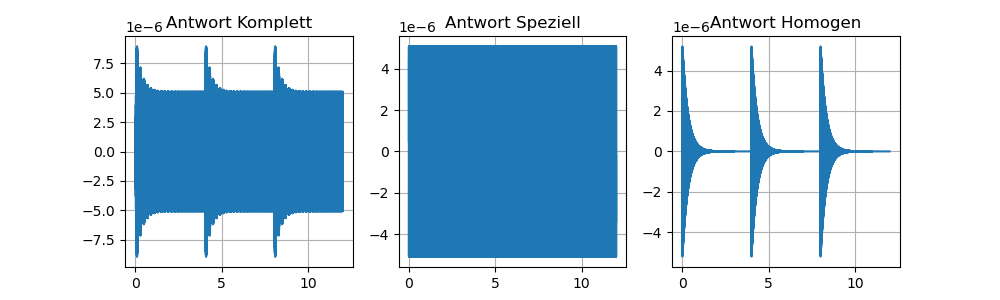

'Antwort Komplett'

Antwort Speziell


Antwort Homogen


In [10]:
# Importieren der notwendigen Bibliotheken
import numpy as np  # Für numerische Berechnungen
from IPython.display import display, Math, Audio  # Zum Anzeigen von Audio und mathematischen Ausdrücken
from math import pi  # Für die Konstante Pi
import sympy as sp  # Für symbolische Berechnungen
import matplotlib.pyplot as plt  # Zum Erstellen von Diagrammen
import ipywidgets as widgets  # Für interaktive Widgets

# Definieren der Funktion, die das RLC-System mit einer Quelle löst und den Klang erzeugt
def Cir_RLC_sound(f_n_e1, xi_e1, f_e1, phi_e1):
    # Definieren von symbolischen Variablen für die Berechnungen
    Kp1, Kp2, K1, K2 = sp.symbols('Kp1, Kp2, K1, K2')

    # Festlegung der Parameter
    Kf_e1 = 1  # Proportionalitätsfaktor für die Amplitude der Quelle
    iLo_e1 = 0  # Anfangswert des Stroms
    vCo_e1 = 0  # Anfangswert der Spannung

    # Berechnung der natürlichen Kreisfrequenz
    w_n_e1 = 2 * pi * f_n_e1  # Natürliche Frequenz (Frequenz des Systems)
    w_e1 = 2 * pi * f_e1  # Frequenz der Quelle

    # Berechnung der charakteristischen Wurzeln des Systems (r1, r2)
    r1_e1 = w_n_e1 * (-xi_e1 + np.sqrt(xi_e1**2 - 1 + 1j * 0))
    r2_e1 = w_n_e1 * (-xi_e1 - np.sqrt(xi_e1**2 - 1 + 1j * 0))

    # Lösung der Gleichungen, die die Konstanten Kp1 und Kp2 bestimmen
    x = sp.solve([Kf_e1 * np.sin(phi_e1) - Kp1 * w_e1**2 + Kp1 * w_n_e1**2 + 2 * Kp2 * w_e1 * w_n_e1 * xi_e1,
                  Kf_e1 * np.cos(phi_e1) - 2 * Kp1 * w_e1 * w_n_e1 * xi_e1 - Kp2 * w_e1**2 + Kp2 * w_n_e1**2], [Kp1, Kp2])

    # Extrahieren der Lösungen für Kp1 und Kp2
    Kp1_e1 = complex(x[Kp1])
    Kp2_e1 = complex(x[Kp2])

    print(Kp1_e1)  # Ausgabe von Kp1
    print(Kp2_e1)  # Ausgabe von Kp2

    # Berechnung der Änderung des Anfangsstroms
    d_iLo_e1 = -2 * xi_e1 * w_n_e1 * iLo_e1 - Kf_e1 / w_e1 * np.cos(phi_e1)

    print(d_iLo_e1)  # Ausgabe der Änderung des Anfangsstroms

    # Lösung für die Konstanten K1 und K2, die die Antwort des Systems bestimmen
    x = sp.solve([K1 + K2 + Kp1_e1 - iLo_e1, K1 * r1_e1 + K2 * r2_e1 + Kp2_e1 * w_e1 - d_iLo_e1], [K1, K2])

    K1_e1 = complex(x[K1])  # Extrahieren von K1
    K2_e1 = complex(x[K2])  # Extrahieren von K2

    # Sampling-Rate und Zeitspanne für die Simulation
    sr = 22050  # Sample-Rate (Häufigkeit der Abtastung in Hertz)
    T = 4.0     # Gesamtdauer der Simulation (in Sekunden)
    t1 = np.linspace(0, T, int(T * sr), endpoint=False)  # Zeitvariable (von 0 bis T)

    # Erstellen der Zeitvariablen für eine Wiederholung der Perioden
    t2 = np.concatenate((t1, t1 + t1[-1], t1 + 2 * t1[-1]), axis=None)

    # Berechnung der Antwort des Systems:
    # - iL_par_e1: Die spezielle Antwort des Systems
    # - iL_hom_e1: Die homogene Antwort des Systems
    iL_par_e1 = Kp1_e1 * np.cos(w_e1 * t1) + Kp2_e1 * np.sin(w_e1 * t1)
    iL_hom_e1 = K1_e1 * np.exp(r1_e1 * t1) + K2_e1 * np.exp(r2_e1 * t1)

    # Wiederholung der Perioden, um das Signal auf die gesamte Zeitspanne auszudehnen
    iL_par_e2 = np.concatenate((iL_par_e1, iL_par_e1, iL_par_e1), axis=None)
    iL_hom_e2 = np.concatenate((iL_hom_e1, iL_hom_e1, iL_hom_e1), axis=None)

    # Gesamte Antwort des Systems (Summe von spezieller und homogener Antwort)
    iL_e2 = iL_par_e2 + iL_hom_e2

    # Erstellen von Diagrammen zur Visualisierung der Ergebnisse
    fig = plt.figure(figsize=(10, 3))

    # Plot der vollständigen Antwort des Systems
    ax0 = fig.add_subplot(1, 3, 1)
    ax0.plot(t2, iL_e2.real)
    ax0.set_title('Antwort Komplett')
    ax0.grid()

    # Plot der speziellen Antwort des Systems
    ax1 = fig.add_subplot(1, 3, 2)
    ax1.plot(t2, iL_par_e2.real)
    ax1.set_title('Antwort Speziell')
    ax1.grid()

    # Plot der homogenen Antwort des Systems
    ax2 = fig.add_subplot(1, 3, 3)
    ax2.plot(t2, iL_hom_e2.real)
    ax2.set_title('Antwort Homogen')
    ax2.grid()

    # Anzeigen der Diagramme
    plt.show()

    # Definieren der Abtastrate und der Zeitvariable für das Audio-Signal
    sr = 22050  # Sample-Rate (Häufigkeit der Abtastung in Hertz)
    T = 4.0     # Gesamtdauer der Audio-Wiedergabe
    t = np.linspace(0, T, int(T * sr), endpoint=False)  # Zeitvariable

    # Wiedergabe der Audioantworten
    display('Antwort Komplett')
    display(Audio(iL_e2.real, rate=sr))  # Wiedergabe der vollständigen Antwort
    print('Antwort Speziell')
    display(Audio(iL_par_e2.real, rate=sr))  # Wiedergabe der speziellen Antwort
    print('Antwort Homogen')
    display(Audio(iL_hom_e2.real, rate=sr))  # Wiedergabe der homogenen Antwort

# Aufruf der Funktion mit Beispielwerten für die Parameter
f_n = 495  # Natürliche Frequenz (Hz)
xi = 0.001  # Dämpfungsfaktor
f_Quelle = 500  # Frequenz der Quelle (Hz)
phi_Quelle = 0  # Phasenwinkel der Quelle (in Radiant)

Cir_RLC_sound(f_n, xi, f_Quelle, phi_Quelle)  # Aufruf der Funktion mit den oben definierten Parametern